In [2]:
import pandas as pd

In [3]:
df= pd.read_csv("C:/Users/shaon/Documents/Academics/Shaoni Projects/Sentiment analysis twitter - python/Tweets.csv")

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [11]:
review_data=df[["airline_sentiment","text"]]

In [12]:
review_data = review_data[review_data['airline_sentiment']!= 'neutral']

In [13]:
print(review_data.shape)

(11541, 2)


In [15]:
review_data.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [16]:
review_data[["airline_sentiment"]].value_counts()

airline_sentiment
negative             9178
positive             2363
dtype: int64

In [17]:
sentiment = review_data.airline_sentiment.factorize()

In [18]:
sentiment

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [20]:
import tensorflow

In [24]:
tweet=review_data.text.values
tweet

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it", ...,
       '@AmericanAir thank you we got on a different flight to Chicago.',
       "@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc",
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"],
      dtype=object)

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [26]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer

In [28]:
tokenizer.fit_on_texts(tweet)

In [29]:
encoded_docs=tokenizer.texts_to_sequences(tweet)

In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [51]:
padded_sequences = pad_sequences(encoded_docs, maxlen=200)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [35]:
embedding_vector_length=32

In [49]:
embedding_vector_length = 32
vocab_size = 30000
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 32)           960000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 200, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 976,651
Trainable params: 976,651
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
history = model.fit(padded_sequences,sentiment[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 40s 132ms/step - loss: 0.4045 - accuracy: 0.8304 - val_loss: 0.2060 - val_accuracy: 0.9199
Epoch 2/5
289/289 [==============================] - 37s 127ms/step - loss: 0.2189 - accuracy: 0.9194 - val_loss: 0.1684 - val_accuracy: 0.9394
Epoch 3/5
289/289 [==============================] - 37s 128ms/step - loss: 0.1679 - accuracy: 0.9366 - val_loss: 0.1636 - val_accuracy: 0.9394
Epoch 4/5
289/289 [==============================] - 37s 128ms/step - loss: 0.1356 - accuracy: 0.9477 - val_loss: 0.1617 - val_accuracy: 0.9459
Epoch 5/5
289/289 [==============================] - 37s 130ms/step - loss: 0.1091 - accuracy: 0.9622 - val_loss: 0.1725 - val_accuracy: 0.9428


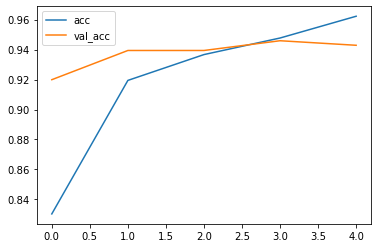

<Figure size 432x288 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label = 'acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

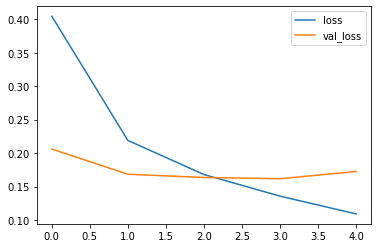

<Figure size 432x288 with 0 Axes>

In [56]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plt.jpg")

In [59]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment[1][prediction])

In [60]:
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)
test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

Predicted label:  positive
Predicted label:  negative
